In [ ]:
# All necessary libraries are imported here.
# You don't need to add more libraries.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1:

### Recall the Gestalt Principle of Continuation and Enclosure, can you explain how you will apply these two principles to your design. Please add your answer after "Answer:" in this cell. 

Hint: you can use the Python code example we covered in the lecture to help you in answering this question.

**Answer:** answer here

# Problem 2: 

### Read the code and the visualization below. Problem statement is attached after the code. 

In [ ]:
# the file path
file_name = "../data/BankChurnersUnknownSet.csv"
# read the data into a pandas dataframe and show the fist five lines
bankChurners = pd.read_csv(file_name)
bankChurners.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,789601308,58,M,3,Unknown,Married,$120K +,Blue,52,4,...,3,12398.0,0,12398.0,0.785,4228,93,0.788,0.000,NaN
1,712545183,51,F,4,Uneducated,Single,Less than $40K,Blue,37,4,...,2,1765.0,1487,278.0,0.738,3333,66,1.000,0.842,NaN
2,796145133,46,F,2,Uneducated,Married,Unknown,Blue,40,3,...,2,6083.0,1716,4367.0,0.618,4528,86,0.755,0.282,NaN
3,770781558,35,F,2,Graduate,Married,Less than $40K,Blue,21,5,...,2,3230.0,2517,713.0,0.677,1914,31,0.348,0.779,NaN
4,814765533,44,F,4,High School,Single,$40K - $60K,Blue,39,4,...,3,10587.0,2517,8070.0,1.052,2971,54,0.742,0.238,NaN


In [ ]:
# Use groupby function to show the average Credit_limit, Total_Trans_Amt, and Total_Trans_Ct in different income_category.
average_cl_tta_ttc = bankChurners.groupby('Income_Category')[['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct']].mean()
data_in_bar = average_cl_tta_ttc.T
print(data_in_bar.index)
data_in_bar

# prepare data in bar chart
data_in_bar.loc['Credit_Limit'] = data_in_bar.loc['Credit_Limit'] / data_in_bar.loc['Credit_Limit'].sum()
data_in_bar.loc['Total_Trans_Amt'] = data_in_bar.loc['Total_Trans_Amt'] / data_in_bar.loc['Total_Trans_Amt'].sum()
data_in_bar.loc['Total_Trans_Ct'] = data_in_bar.loc['Total_Trans_Ct'] / data_in_bar.loc['Total_Trans_Ct'].sum()
print(data_in_bar.columns)

over_120 = data_in_bar['$120K +']
in_40_60 = data_in_bar['$40K - $60K']
in_60_80 = data_in_bar['$60K - $80K']
in_80_120 = data_in_bar['$80K - $120K']
less_40 = data_in_bar['Less than $40K']
unknow = data_in_bar['Unknown']

Index(['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct'], dtype='object')
Index(['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Unknown'],
      dtype='object', name='Income_Category')


In [ ]:
data_in_bar

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Credit_Limit,0.311679,0.081755,0.166513,0.247283,0.056051,0.136719
Total_Trans_Amt,0.183754,0.164537,0.160583,0.173120,0.159037,0.158969
Total_Trans_Ct,0.175087,0.164519,0.161464,0.161502,0.167698,0.169730


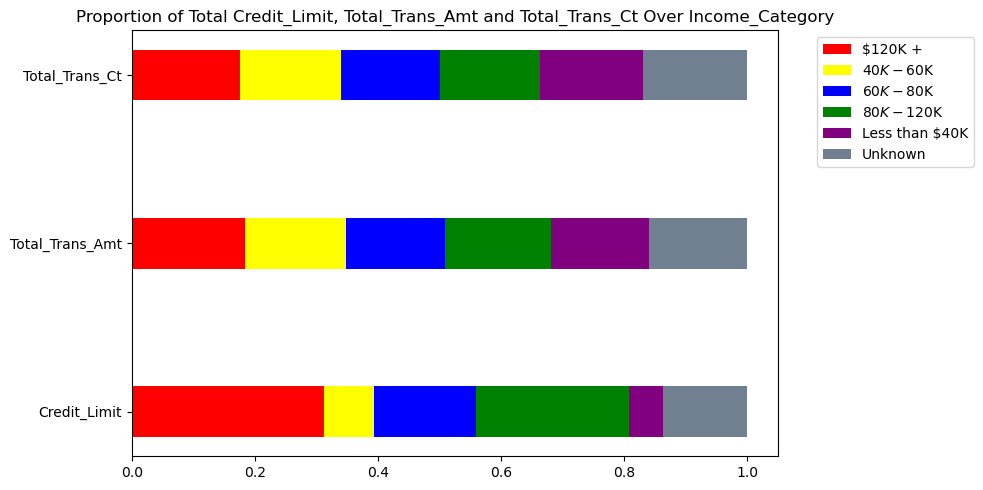

In [ ]:
# create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))
  
ax.set_title('Proportion of Total Credit_Limit, Total_Trans_Amt and Total_Trans_Ct Over Income_Category')

y_axis = list(data_in_bar.index)
data_in_bar.loc['Credit_Limit'] = data_in_bar.loc['Credit_Limit'] / data_in_bar.loc['Credit_Limit'].sum()
data_in_bar.loc['Total_Trans_Amt'] = data_in_bar.loc['Total_Trans_Amt'] / data_in_bar.loc['Total_Trans_Amt'].sum()
data_in_bar.loc['Total_Trans_Ct'] = data_in_bar.loc['Total_Trans_Ct'] / data_in_bar.loc['Total_Trans_Ct'].sum()

over_120 = data_in_bar['$120K +']
in_40_60 = data_in_bar['$40K - $60K']
in_60_80 = data_in_bar['$60K - $80K']
in_80_120 = data_in_bar['$80K - $120K']
less_40 = data_in_bar['Less than $40K']
unknow = data_in_bar['Unknown']

b1 = plt.barh(y_axis, over_120, label = '$120K +', height = 0.3, color="red")

b2 = plt.barh(y_axis, in_40_60, label = '$40K - $60K', left = over_120, height = 0.3, color="yellow")

b3 = plt.barh(y_axis, in_60_80, label = '$60K - $80K', left = over_120 + in_40_60, height = 0.3, color="blue")

b4 = plt.barh(y_axis, in_80_120, label = '$80K - $120K', left = over_120 + in_40_60 + in_60_80, height = 0.3, color="green")

b5 = plt.barh(y_axis, less_40, label = 'Less than $40K', left = over_120 + in_40_60 + in_60_80 + in_80_120, height = 0.3, color="purple")

b6 = plt.barh(y_axis, unknow, label = 'Unknown', left = over_120 + in_40_60 + in_60_80 + in_80_120 + less_40, height = 0.3, color="slategrey")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### Please identify the issues associated with the visualization above using the Gestalt Principle. Clearly state the issue you found and state how to apply Gestalt Principle to fix the issues in this cell after "Answer:". 
(To edit a Jupyter Markdown cell, please double click the cell and edit. Once finished, please execute this cell by holding on Shift and press Enter on your keyboard.)

**Answer:**

# Problem 3:

### Apply Gestalt Principle to the above visualization and fix the issues you state in Problem 1. Please code a new bar chart in the cell below.  
Note: you can apply any color you like to fix the issues. 

In [4]:
### add your code for problem 2 in this cell below




# Problem 4: 

### Read the code and the visualization below. Problem statement is attached after the code.

In [ ]:
# the file path
fname = "../data/16_online_shoppers_purchasing_intention.csv"
# read the data into a pandas dataframe and show the fist five lines
data = pd.read_csv(fname)
data.head()

,Index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# total time spend by shopper for searching information and products
data['Info_Prod_Duration'] = data['Informational_Duration'] + data['ProductRelated_Duration']
data['Info_Prod_Duration']

# Use groupby fupnction to show the average total time spent in different regions
data.groupby('Region')[['Info_Prod_Duration']].mean()

# show mean and median of total_duration between different visitortype
data.groupby('VisitorType')[['Info_Prod_Duration']].aggregate(['mean','median'])

Info_Prod_Duration            
                                mean      median
VisitorType                                     
New_Visitor               655.630827  429.583333
Other                     582.090352  151.416667
Returning_Visitor        1326.523482  672.700000

### Please follow the requirement below to code your solution using Python.
    1. Choosing an appropriate chart to visualize the data in the table above 
    2. Apply Gestalt Principle to your visualization
    3. Add your Python code to the cell below.

In [6]:
### Your code here


# Problem 5

### Recall the Preattentive Attributes, can you explain how Preattentive Atributes works in the problem 4 visualization. Please add your answer after "Answer:" in this cell. 

Hint: If you can't generate the chart for problem 4, you can use the Python code example we covered in the lecture to help you in answering this question.

**Answer:**

# Problem 6

### Final Project Checkpoints. 
    1. Please pick a data set and briefly describe it, including samples size, columns, etc. 
    1. State the reasons for choosing the dataset. 
    2. Propose your objective and initial problems towards your analysis. 
### Please add your answer after "Answer:" in this cell.

**Answer:**